## Prediction visualization
#### Here we show some plot in order to see the differences between predictions and real values. So, we start by importing the test split values (both features and target) and the predictions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

test_features = pd.read_json("../data/segregation/presencesTestFeatures.json")
test_target = pd.read_json("../data/segregation/presencesTestTarget.json", typ='series').to_frame("target")
preds = pd.read_csv("../predictions/preds.csv", names=["prediction"])

#### We add the target values to the respective features.

In [2]:
test_features["target"] = test_target["target"]

#### We create a plot related to a precise room that shows the number of people during the month. 
#### Of course the plot is strange because we have a gap in the months. The dataset is related to presences registered from late November (11) to Febraury (2) so we have missing values in between.

Text(0, 0.5, 'presences')

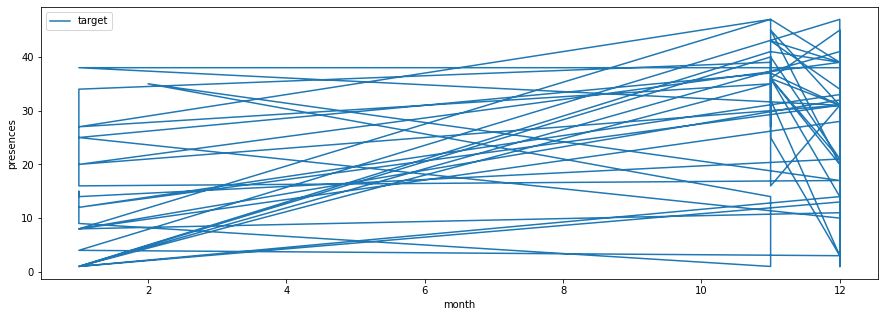

In [3]:
test_df = test_features[(test_features["city"] == 1) & (test_features["building"] == 1) & (test_features["room"] == 1)]

ax = test_df.plot(x="month", y="target", figsize=(15, 5))

ax.set_xlabel("month")
ax.set_ylabel("presences")

#### We must reset the index of the test_features DataFrame because has random values obtained from the random split during the model training phase. Instead, the prediction one has progressive indexes so it's not possible to match values that, anyway, are listed in the same order.
#### After that, we can add the predicted values to the respective features.

In [4]:
test_features = test_features.reset_index(drop=True)

test_features["target"] = preds["prediction"]

#### Same actions as before.

Text(0, 0.5, 'presences')

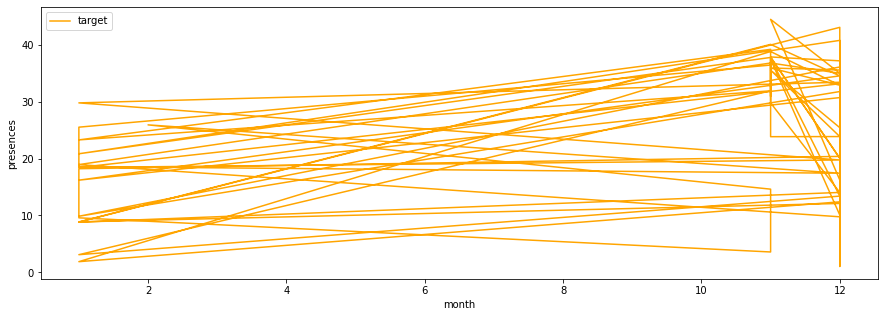

In [5]:
preds_df = test_features[(test_features["city"] == 1) & (test_features["building"] == 1) & (test_features["room"] == 1)]

ax = preds_df.plot(x="month", y="target", figsize=(15, 5), color="orange")

ax.set_xlabel("month")
ax.set_ylabel("presences")

#### Here we can see the difference between the two plots. Blue for real values and orange for predictions.

Text(0, 0.5, 'presences')

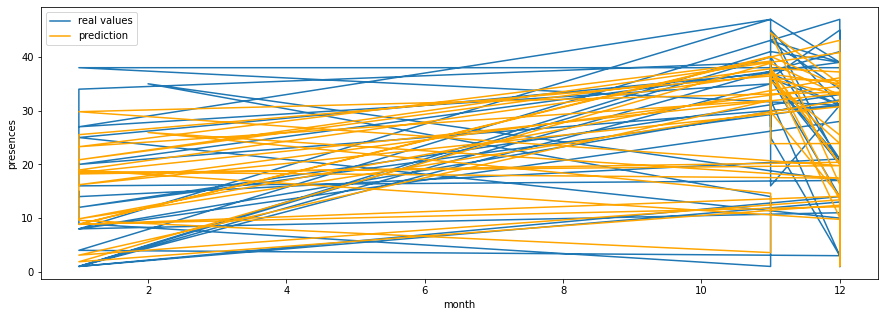

In [6]:
ax = test_df.plot(x="month", y="target", figsize=(15, 5))
ax_sum = preds_df.plot(x="month", y="target", figsize=(15, 5), color="orange", ax=ax)
ax_sum.legend(["real values", "prediction"])

ax_sum.set_xlabel("month")
ax_sum.set_ylabel("presences")